In [ ]:
# RUN THIS COMMAND ONLY IF YOU USE GOOGLE COLAB.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# RUN THIS COMMAND ONLY IF YOU USE GOOGLE COLAB.
%cd drive/MyDrive/TechLabs/03_Statistics\ and\ Data\ Visualization/Part\ B\ -\ Multivariate\ Data

# Chapter 99 - Practice - Multivariate Data
## Hey Techie,
Welcome to the third part's practice notebook. In the following two practice task you can test your knowledge regarding analyzing and visualizing univariate data.   

### Have fun! :-)

#### Credits
Understanding and Visualizing Data with Python, University of Michigan (Coursera), https://www.coursera.org/learn/understanding-visualization-data
   
<hr style="border:2px solid gray"> </hr> 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

df = pd.read_csv("data/nhanes_2015_2016.csv")

## Task 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two diastolic blood pressure measures and the first two systolic ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1), [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)) blood pressure measures.

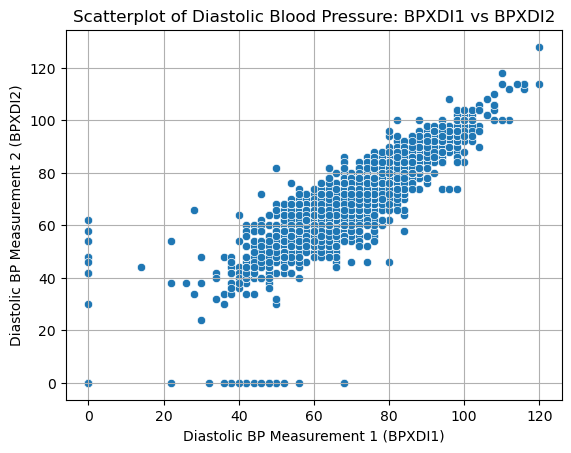

In [4]:
# START YOUR CODE HERE.
sns.scatterplot(data=df, x='BPXDI1', y='BPXDI2')
plt.xlabel('Diastolic BP Measurement 1 (BPXDI1)')
plt.ylabel('Diastolic BP Measurement 2 (BPXDI2)')
plt.title('Scatterplot of Diastolic Blood Pressure: BPXDI1 vs BPXDI2')
plt.grid(True)
plt.show()

In [10]:
bp_cols = ['BPXDI1', 'BPXDI2', 'BPXSY1', 'BPXSY2']
bp_data = df[bp_cols].dropna()
correlation_matrix = bp_data.corr()
print("4x4 Correlation Matrix:")
print(correlation_matrix)

4x4 Correlation Matrix:
          BPXDI1    BPXDI2    BPXSY1    BPXSY2
BPXDI1  1.000000  0.884722  0.317497  0.329843
BPXDI2  0.884722  1.000000  0.277681  0.298392
BPXSY1  0.317497  0.277681  1.000000  0.962287
BPXSY2  0.329843  0.298392  0.962287  1.000000


In [6]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [12]:
sns.regplot(x="BPXDI1", y="BPXDI2", data=df, fit_reg=False, scatter_kws={"alpha": 0.2});
print(df.loc[:, ["BPXDI1", "BPXDI2", "BPXSY1", "BPXSY2"]].dropna().corr())

          BPXDI1    BPXDI2    BPXSY1    BPXSY2
BPXDI1  1.000000  0.884722  0.317497  0.329843
BPXDI2  0.884722  1.000000  0.277681  0.298392
BPXSY1  0.317497  0.277681  1.000000  0.962287
BPXSY2  0.329843  0.298392  0.962287  1.000000


__1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

*ENTER YOUR ANSWER HERE.*

__1b.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

*ENTER YOUR ANSWER HERE.*

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Sample Solution (click to expand)</b></font>
</summary>
<p>
    <code>sns.regplot(x="BPXDI1", y="BPXDI2", data=df, fit_reg=False, scatter_kws={"alpha": 0.2});</code><br />
    <code>print(df.loc[:, ["BPXDI1", "BPXDI2", "BPXSY1", "BPXSY2"]].dropna().corr())</code><br />
    <ol>
        <li>The correlation for the two systolic blood pressure measurements (r = .96) exceeds the one for the two diastolic blood pressure measurements (r = .88).</li>
        <li>They are less correlated (r = .32 vs. r = .30).</li>
</p>
</details>

## Task 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows, *RIAGENDR*) and by race/ethnicity groups (columns, *RIDRETH1*).

In [16]:
# START YOUR CODE HERE.
g = sns.FacetGrid(
    df_plot, 
    row='Gender', 
    col='Race/Ethnicity', 
    margin_titles=True, 
    height=4, 
    aspect=1
)

g.map_dataframe(sns.scatterplot, x='BPXSY1', y='BPXDI1', alpha=0.6)
g.set_axis_labels("Systolic BP (BPXSY1)", "Diastolic BP (BPXDI1)")
g.set_titles(row_template='{row_name}', col_template='{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Blood Pressure Scatterplots Stratified by Gender and Race/Ethnicity")

plt.show()

NameError: name 'df_plot' is not defined

__2a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

*ENTER YOUR ANSWER HERE.*

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Sample Solution (click to expand)</b></font>
</summary>
<p>
    <code>sns.FacetGrid(data=df, row="RIAGENDR", col="RIDRETH1").map(plt.scatter, "BPXSY1", "BPXDI1", alpha=0.5).add_legend();</code><br />
    <ol><li>First, there is only a small relationship between the two blood pressure measurements for women and men for ethnicity group three. Second, there seems to be always at least a moderate relationship between the two blood pressure measurements for the other ethnicity groups.</li></ol>
</p>
</details>

## Task 3

Use violin plots to compare the distributions of ages within groups defined by gender and educational attainment (skip level 9 for the educational attainment).

In [ ]:
# START YOUR CODE HERE.


__3a.__ Comment on any evident differences among the age distributions in the different demographic groups.

*ENTER YOUR ANSWER HERE.*

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Sample Solution (click to expand)</b></font>
</summary>
<p>
    <code>filt = (df["DMDEDUC2"] != 9)</code><br />
    <code>df_filt = df.loc[filt, :]</code><br />
    <code>sns.violinplot(x=df_filt["DMDEDUC2"], y=df_filt["RIDAGEYR"], hue=df_filt["RIAGENDR"]);</code><br />
    <ol><li>One possible answer could be that every educational attaintment group seems to have a lower average age than participants with less than a 9th-grade degree (level 1).</li></ol>
</p>
</details>

## Task 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

In [ ]:
# START YOUR CODE HERE.


__4a.__ Comment on the trends in BMI across the demographic groups.

*ENTER YOUR ANSWER HERE.*

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Sample Solution (click to expand)</b></font>
</summary>
<p>
    <code>df["agegrp"] = pd.cut(df["RIDAGEYR"], [10, 20, 30, 40, 50, 60, 70, 80])</code><br />
    <code>sns.violinplot(x=df["agegrp"], y=df["BMXBMI"], hue=df["RIAGENDR"]);</code><br />
    <ol><li>At first (group 10-19 compared to 20-29), the BMI increases slightly. Afterward, until age 70, it stays relatively stable. At ages 70-80, it decreases a bit (compared to groups 20-69).</li></ol>
</p>
</details>

## Task 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1. Therefore, do not forget to drop respective NaN values.

In [ ]:
# START YOUR CODE HERE.


__5a.__ Which ethnic group has the highest rate of being uninsured in the past year?

*ENTER YOUR ANSWER HERE.*

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Sample Solution (click to expand)</b></font>
</summary>
<p>
    <code>df_filt = df[["HIQ210", "RIDRETH1"]].dropna()</code><br />
    <code>freq_table = df_filt.value_counts().unstack()/df_filt["RIDRETH1"].value_counts()</code><br />
    <code>freq_table.columns.name = "RIDRETH1"</code><br />
    <code>freq_table</code><br />
    <ol><li>Group 1 has the highest rate of being uninsured in the past year.</li></ol>
</p>
</details>